In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
import time

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning

In [3]:
# Load data
df = pd.read_csv('clean_kaggle_data_2022.csv')
df

Duration (in seconds)                           Q2  \
0     Duration (in seconds)  What is your age (# years)?   
1                       851                        55-59   
2                       501                        30-34   
3                       787                          70+   
4                      1132                        40-44   
...                     ...                          ...   
8132                    540                        40-44   
8133                    603                        35-39   
8134                    557                        40-44   
8135                    860                        25-29   
8136                    597                        35-39   

                                          Q3  \
0     What is your gender? - Selected Choice   
1                                        Man   
2                                        Man   
3                                        Man   
4                                        Man   
...                                      ...   
8132                                     Man   
8133                                     Man   
8134                                     Man   
8135                                     Man   
8136                                   Woman   

                                             Q4  \
0     In which country do you currently reside?   
1                                        France   
2                                       Germany   
3                                     Australia   
4                      United States of America   
...                                         ...   
8132                   United States of America   
8133                                      India   
8134                                      India   
8135                                     Turkey   
8136                                     Israel   

                                                     Q5  \
0     Are you currently a student? (high school, uni...   
1                                                    No   
2                                                    No   
3                                                    No   
4                                                    No   
...                                                 ...   
8132                                                 No   
8133                                                 No   
8134                                                 No   
8135                                                 No   
8136                                                 No   

                                                   Q6_1  \
0     On which platforms have you begun or completed...   
1                                              Coursera   
2                                              Coursera   
3                                              Coursera   
4                                              Coursera   
...                                                 ...   
8132                                                NaN   
8133                                                NaN   
8134                                                NaN   
8135                                                NaN   
8136                                                NaN   

                                                   Q6_2  \
0     On which platforms have you begun or completed...   
1                                                   NaN   
2                                                   edX   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
8132                                                NaN   
8133                                                NaN   
8134                                                NaN   
8135                                                NaN   
8136                        

In [4]:
print(df.iloc[:1].values)

[['Duration (in seconds)' 'What is your age (# years)?'
  'What is your gender? - Selected Choice'
  'In which country do you currently reside?'
  'Are you currently a student? (high school, university, or graduate)'
  'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera'
  'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX'
  'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses'
  'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp'
  'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai'
  'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity'
  'On which platforms 

In [5]:
# Pick some most revelant questions as the features
df = df[['Q2','Q3','Q4','Q8','Q9','Q16','Q23','Q24','Q25','Q29_Encoded']]
df

Q2                                      Q3  \
0     What is your age (# years)?  What is your gender? - Selected Choice   
1                           55-59                                     Man   
2                           30-34                                     Man   
3                             70+                                     Man   
4                           40-44                                     Man   
...                           ...                                     ...   
8132                        40-44                                     Man   
8133                        35-39                                     Man   
8134                        40-44                                     Man   
8135                        25-29                                     Man   
8136                        35-39                                   Woman   

                                             Q4  \
0     In which country do you currently reside?   
1                                        France   
2                                       Germany   
3                                     Australia   
4                      United States of America   
...                                         ...   
8132                   United States of America   
8133                                      India   
8134                                      India   
8135                                     Turkey   
8136                                     Israel   

                                                     Q8  \
0     What is the highest level of formal education ...   
1     Some college/university study without earning ...   
2                                     Bachelor’s degree   
3                                       Doctoral degree   
4                                       Doctoral degree   
...                                                 ...   
8132                                    Master’s degree   
8133                                    Master’s degree   
8134                                  Bachelor’s degree   
8135                                    Master’s degree   
8136                                    Doctoral degree   

                                                     Q9  \
0     Have you ever published any academic research ...   
1                                                   NaN   
2                                                   NaN   
3                                                   Yes   
4                                                   Yes   
...                                                 ...   
8132                                                 No   
8133                                                 No   
8134                                                NaN   
8135                                                Yes   
8136                                                Yes   

                                                    Q16  \
0     For how many years have you used machine learn...   
1                                             1-2 years   
2                                             4-5 years   
3                                            5-10 years   
4                                            5-10 years   
...                                                 ...   
8132                                       Under 1 year   
8133                                          1-2 years   
8134              I do not use machine learning methods   
8135                                       Under 1 year   
8136                                       Under 1 year   

                                                    Q23  \
0     Select the title most similar to your current ...   
1                                        Data Scientist   
2                                     Software Engineer   
3                                    Research Scientist   
4                                    Developer Advocate   
...         

In [6]:
# drop the frist row
df.drop(index=0, inplace=True)
df

Q2     Q3                        Q4  \
1     55-59    Man                    France   
2     30-34    Man                   Germany   
3       70+    Man                 Australia   
4     40-44    Man  United States of America   
5     40-44    Man  United States of America   
...     ...    ...                       ...   
8132  40-44    Man  United States of America   
8133  35-39    Man                     India   
8134  40-44    Man                     India   
8135  25-29    Man                    Turkey   
8136  35-39  Woman                    Israel   

                                                     Q8   Q9  \
1     Some college/university study without earning ...  NaN   
2                                     Bachelor’s degree  NaN   
3                                       Doctoral degree  Yes   
4                                       Doctoral degree  Yes   
5                                       Master’s degree  Yes   
...                                                 ...  ...   
8132                                    Master’s degree   No   
8133                                    Master’s degree   No   
8134                                  Bachelor’s degree  NaN   
8135                                    Master’s degree  Yes   
8136                                    Doctoral degree  Yes   

                                        Q16                      Q23  \
1                                 1-2 years           Data Scientist   
2                                 4-5 years        Software Engineer   
3                                5-10 years       Research Scientist   
4                                5-10 years       Developer Advocate   
5                                5-10 years           Data Scientist   
...                                     ...                      ...   
8132                           Under 1 year           Data Architect   
8133                              1-2 years           Data Scientist   
8134  I do not use machine learning methods            Data Engineer   
8135                           Under 1 year  Engineer (non-software)   
8136                           Under 1 year       Research Scientist   

                                         Q24                       Q25  \
1     Online Service/Internet-based Services            0-49 employees   
2                  Insurance/Risk Assessment         250-999 employees   
3                  Government/Public Service      1000-9,999 employees   
4                       Computers/Technology      1000-9,999 employees   
5                       Computers/Technology      1000-9,999 employees   
...                                      ...                       ...   
8132                      Accounting/Finance  10,000 or more employees   
8133             Broadcasting/Communications  10,000 or more employees   
8134                    Computers/Technology            0-49 employees   
8135                           Energy/Mining  10,000 or more employees   
8136                     Academics/Education            0-49 employees   

      Q29_Encoded  
1             2.0  
2            10.0  
3            10.0  
4            13.0  
5            13.0  
...           ...  
8132         10.0  
8133          0.0  
8134          0.0  
8135          2.0  
8136          1.0  

[8136 rows x 10 columns]

In [7]:
# check the missing values
df.isnull().sum()

Q2                0
Q3                0
Q4                0
Q8                0
Q9             2941
Q16             684
Q23               0
Q24               0
Q25               0
Q29_Encoded       0
dtype: int64

In [8]:
print(df['Q9'].mode().values)
print(df['Q16'].mode().values)

['Yes']
['Under 1 year']


In [9]:
# fill the missing values
df['Q9'].fillna('No', inplace=True)
df['Q16'].fillna('Under 1 year', inplace=True)
df.isnull().sum()

Q2             0
Q3             0
Q4             0
Q8             0
Q9             0
Q16            0
Q23            0
Q24            0
Q25            0
Q29_Encoded    0
dtype: int64

# Data Exploration

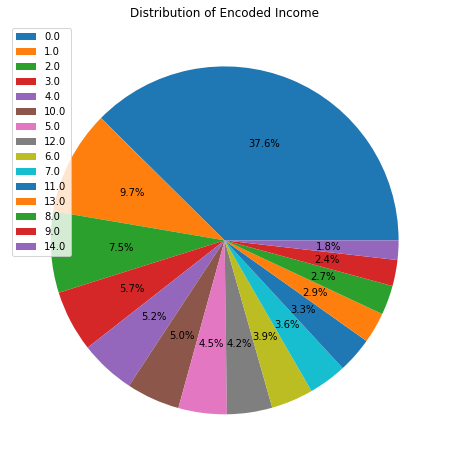

In [10]:
# Distribution of income
bar_x = df['Q29_Encoded'].value_counts().index
bar_height = df['Q29_Encoded'].value_counts().values

plt.figure(figsize=(10,8))

# pie chart 
plt.pie(bar_height,autopct='%1.1f%%')
plt.legend(bar_x,loc='best')
plt.title('Distribution of Encoded Income')
plt.show()

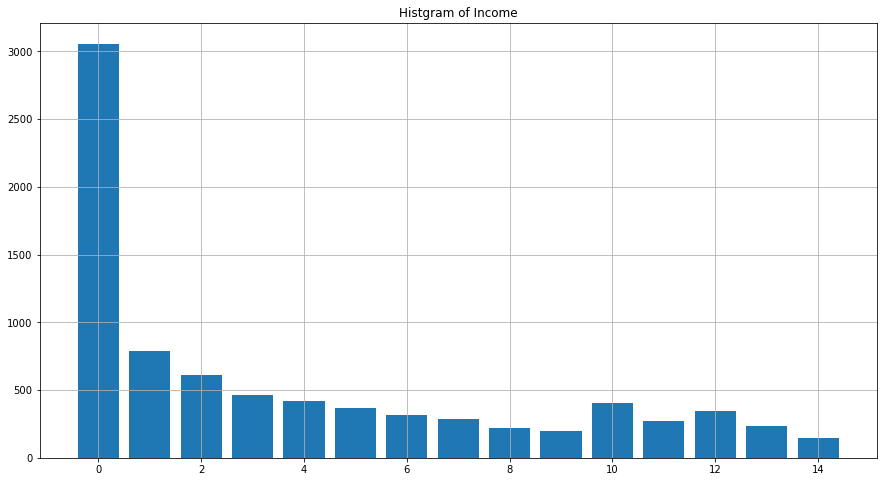

In [11]:
# bar chart
plt.figure(figsize=(15,8))
plt.bar(x= bar_x,height= bar_height)
plt.title('Histgram of Income')
plt.grid()

In [12]:
# Encode the dataframe
df_copy = df.copy()
# Using OneHotEncoder to convert categorical data
df_dummy = pd.get_dummies(df_copy, drop_first=True)
df_dummy.head()

Q29_Encoded  Q2_22-24  Q2_25-29  Q2_30-34  Q2_35-39  Q2_40-44  Q2_45-49  \
1          2.0         0         0         0         0         0         0   
2         10.0         0         0         1         0         0         0   
3         10.0         0         0         0         0         0         0   
4         13.0         0         0         0         0         1         0   
5         13.0         0         0         0         0         1         0   

   Q2_50-54  Q2_55-59  Q2_60-69  ...  Q24_Medical/Pharmaceutical  \
1         0         1         0  ...                           0   
2         0         0         0  ...                           0   
3         0         0         0  ...                           0   
4         0         0         0  ...                           0   
5         0         0         0  ...                           0   

   Q24_Non-profit/Service  Q24_Online Service/Internet-based Services  \
1                       0                                           1   
2                       0                                           0   
3                       0                                           0   
4                       0                                           0   
5                       0                                           0   

   Q24_Other  Q24_Retail/Sales  Q24_Shipping/Transportation  \
1          0                 0                            0   
2          0                 0                            0   
3          0                 0                            0   
4          0                 0                            0   
5          0                 0                            0   

   Q25_10,000 or more employees  Q25_1000-9,999 employees  \
1                             0                         0   
2                             0                         0   
3                             0                         1   
4                             0                         1   
5                             0                         1   

   Q25_250-999 employees  Q25_50-249 employees  
1                      0                     0  
2                      1                     0  
3                      0                     0  
4                      0                     0  
5                      0                     0  

[5 rows x 117 columns]

# Feature Selection

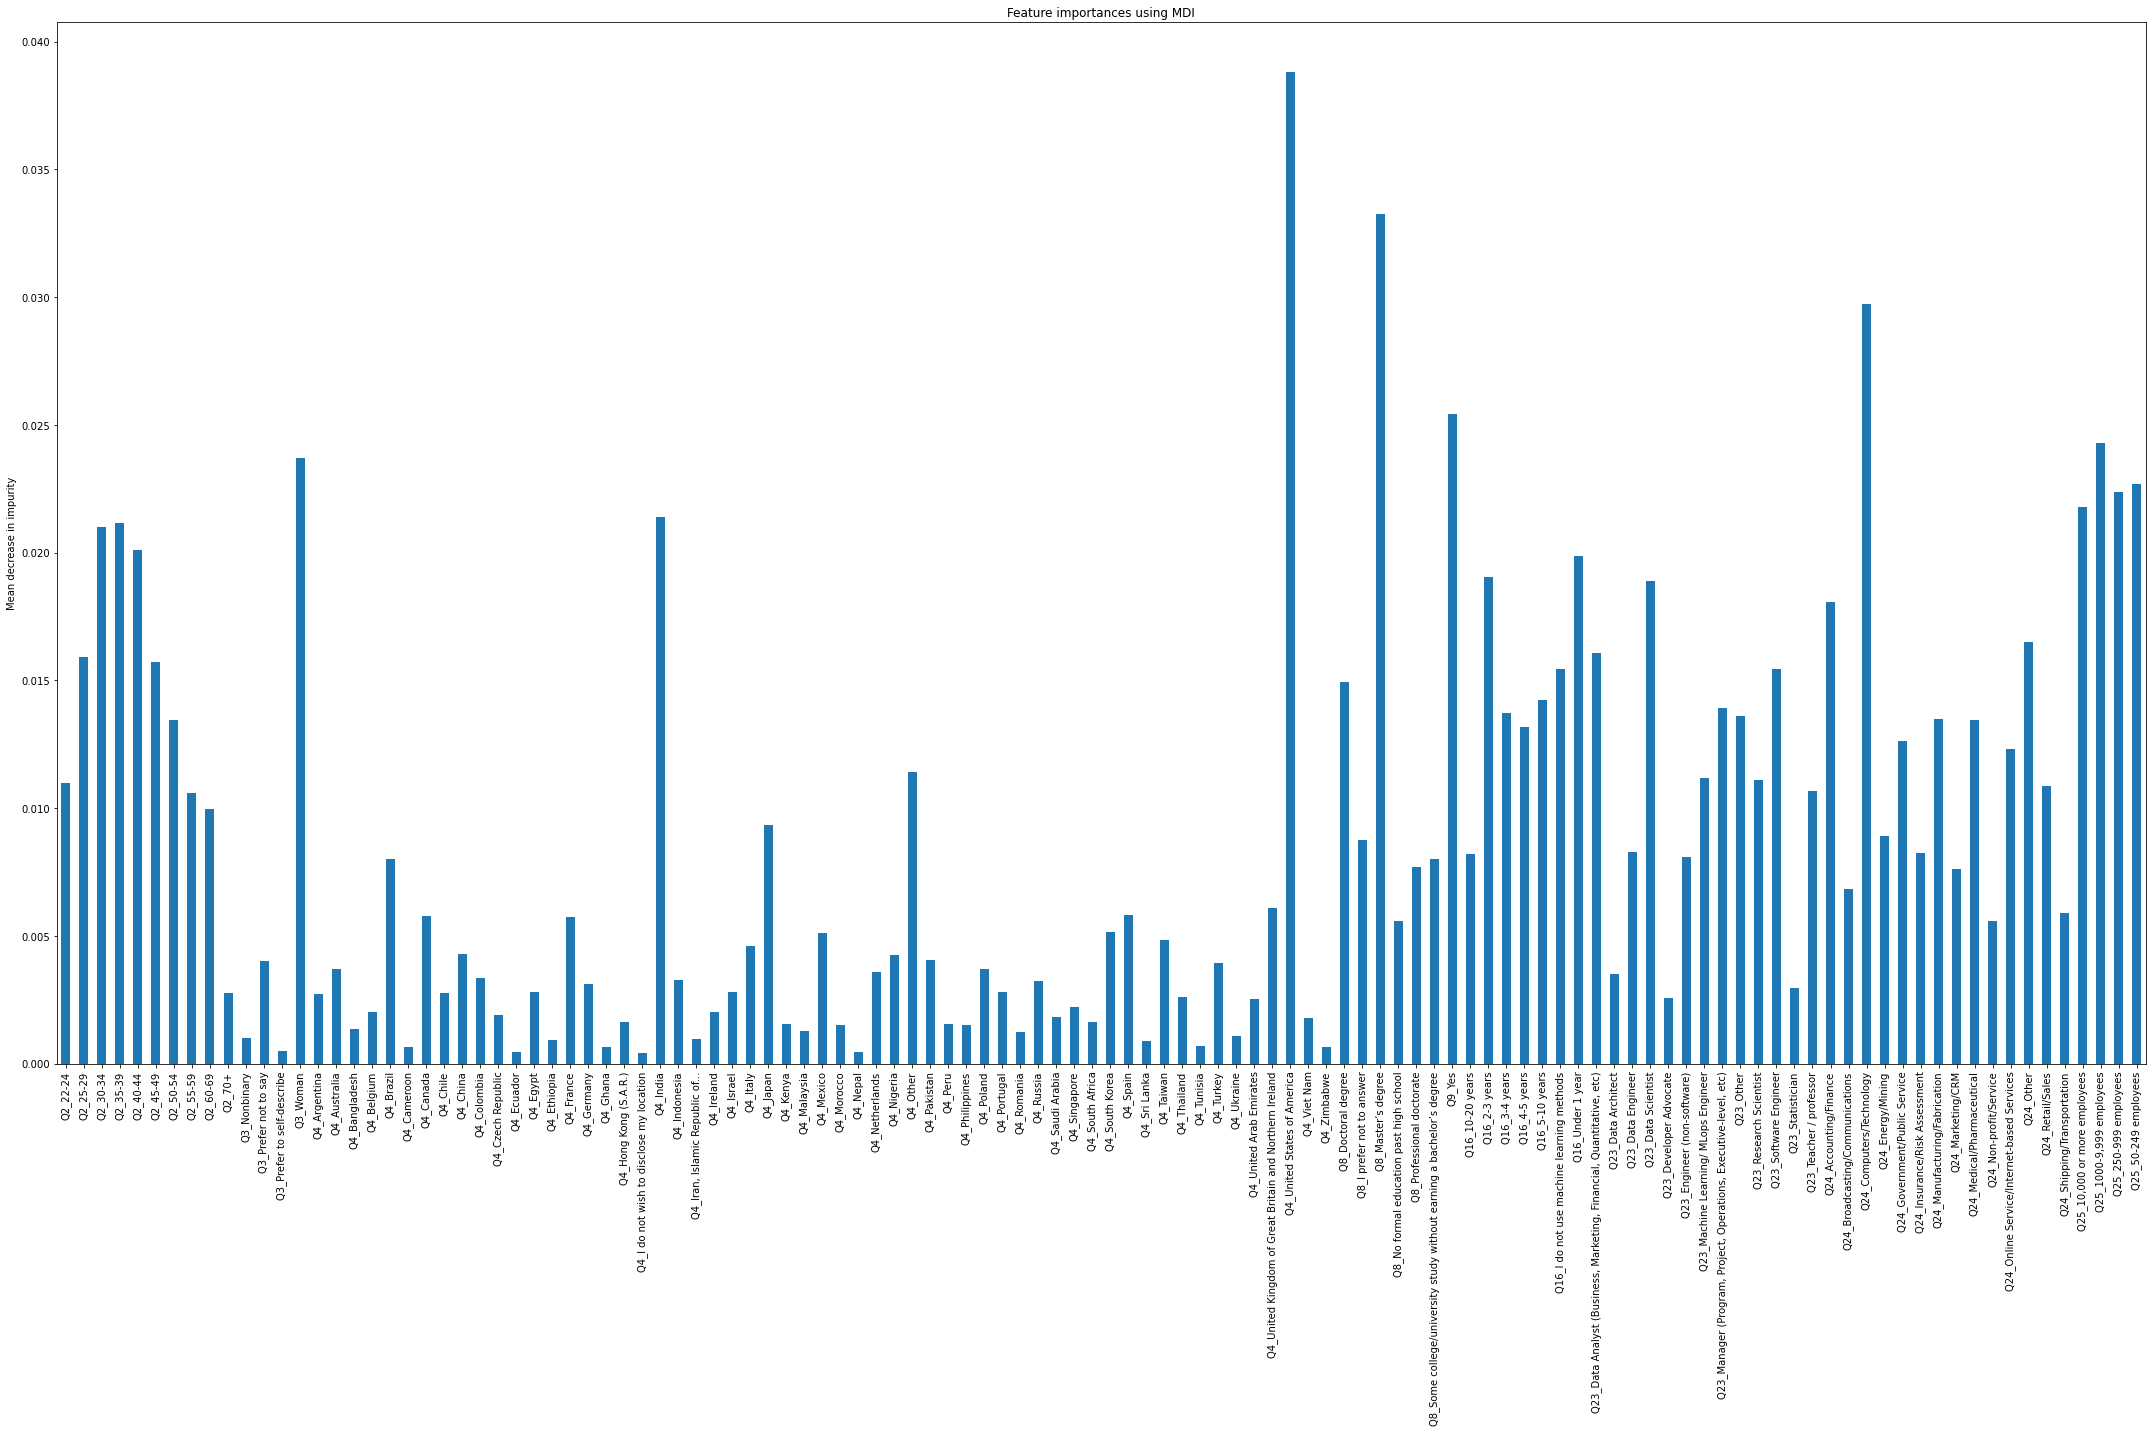

In [13]:
# Feature importance plot
X = df_dummy.drop(['Q29_Encoded'],axis=1)
y = df_dummy['Q29_Encoded']
lbl = preprocessing.LabelEncoder()
feature_names = X.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(figsize = (30,20)) #yerr=std, ax=ax
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [14]:
# top 20 featrues after encoding
forest_importances.sort_values(ascending=False).head(20)

Q4_United States of America                                             0.038812
Q8_Master’s degree                                                      0.033253
Q24_Computers/Technology                                                0.029733
Q9_Yes                                                                  0.025438
Q25_1000-9,999 employees                                                0.024285
Q3_Woman                                                                0.023698
Q25_50-249 employees                                                    0.022704
Q25_250-999 employees                                                   0.022353
Q25_10,000 or more employees                                            0.021775
Q4_India                                                                0.021389
Q2_35-39                                                                0.021174
Q2_30-34                                                                0.020993
Q2_40-44                    

Estimated coefficient by forest:  [0.01096287 0.01591161 0.02099273 0.02117376 0.02008265 0.01570488
 0.01344803 0.01059748 0.00996298 0.00277229 0.00099922 0.00400851
 0.00047703 0.02369774 0.0027089  0.00370121 0.00134474 0.00201853
 0.00802028 0.00064431 0.00578909 0.00276908 0.00430282 0.00336053
 0.00190563 0.00045188 0.00280963 0.00091749 0.00574418 0.00313249
 0.00065945 0.00163075 0.00039901 0.02138922 0.0032784  0.00095678
 0.00200466 0.00279117 0.00460273 0.00933142 0.00154571 0.00128768
 0.00509776 0.00150164 0.0004619  0.0035918  0.00426664 0.01139469
 0.00406301 0.00156246 0.00151422 0.00370584 0.0028039  0.00122513
 0.00322191 0.0018066  0.00219852 0.00163268 0.00515811 0.00582649
 0.00087107 0.00481656 0.00261515 0.00068993 0.00393243 0.0010805
 0.0025443  0.00609131 0.03881239 0.0017848  0.00064935 0.01495217
 0.00873933 0.0332535  0.00556646 0.00769684 0.00799053 0.02543804
 0.00821403 0.01903354 0.01372346 0.01319006 0.01421075 0.01542961
 0.01985081 0.01606393 0.0034

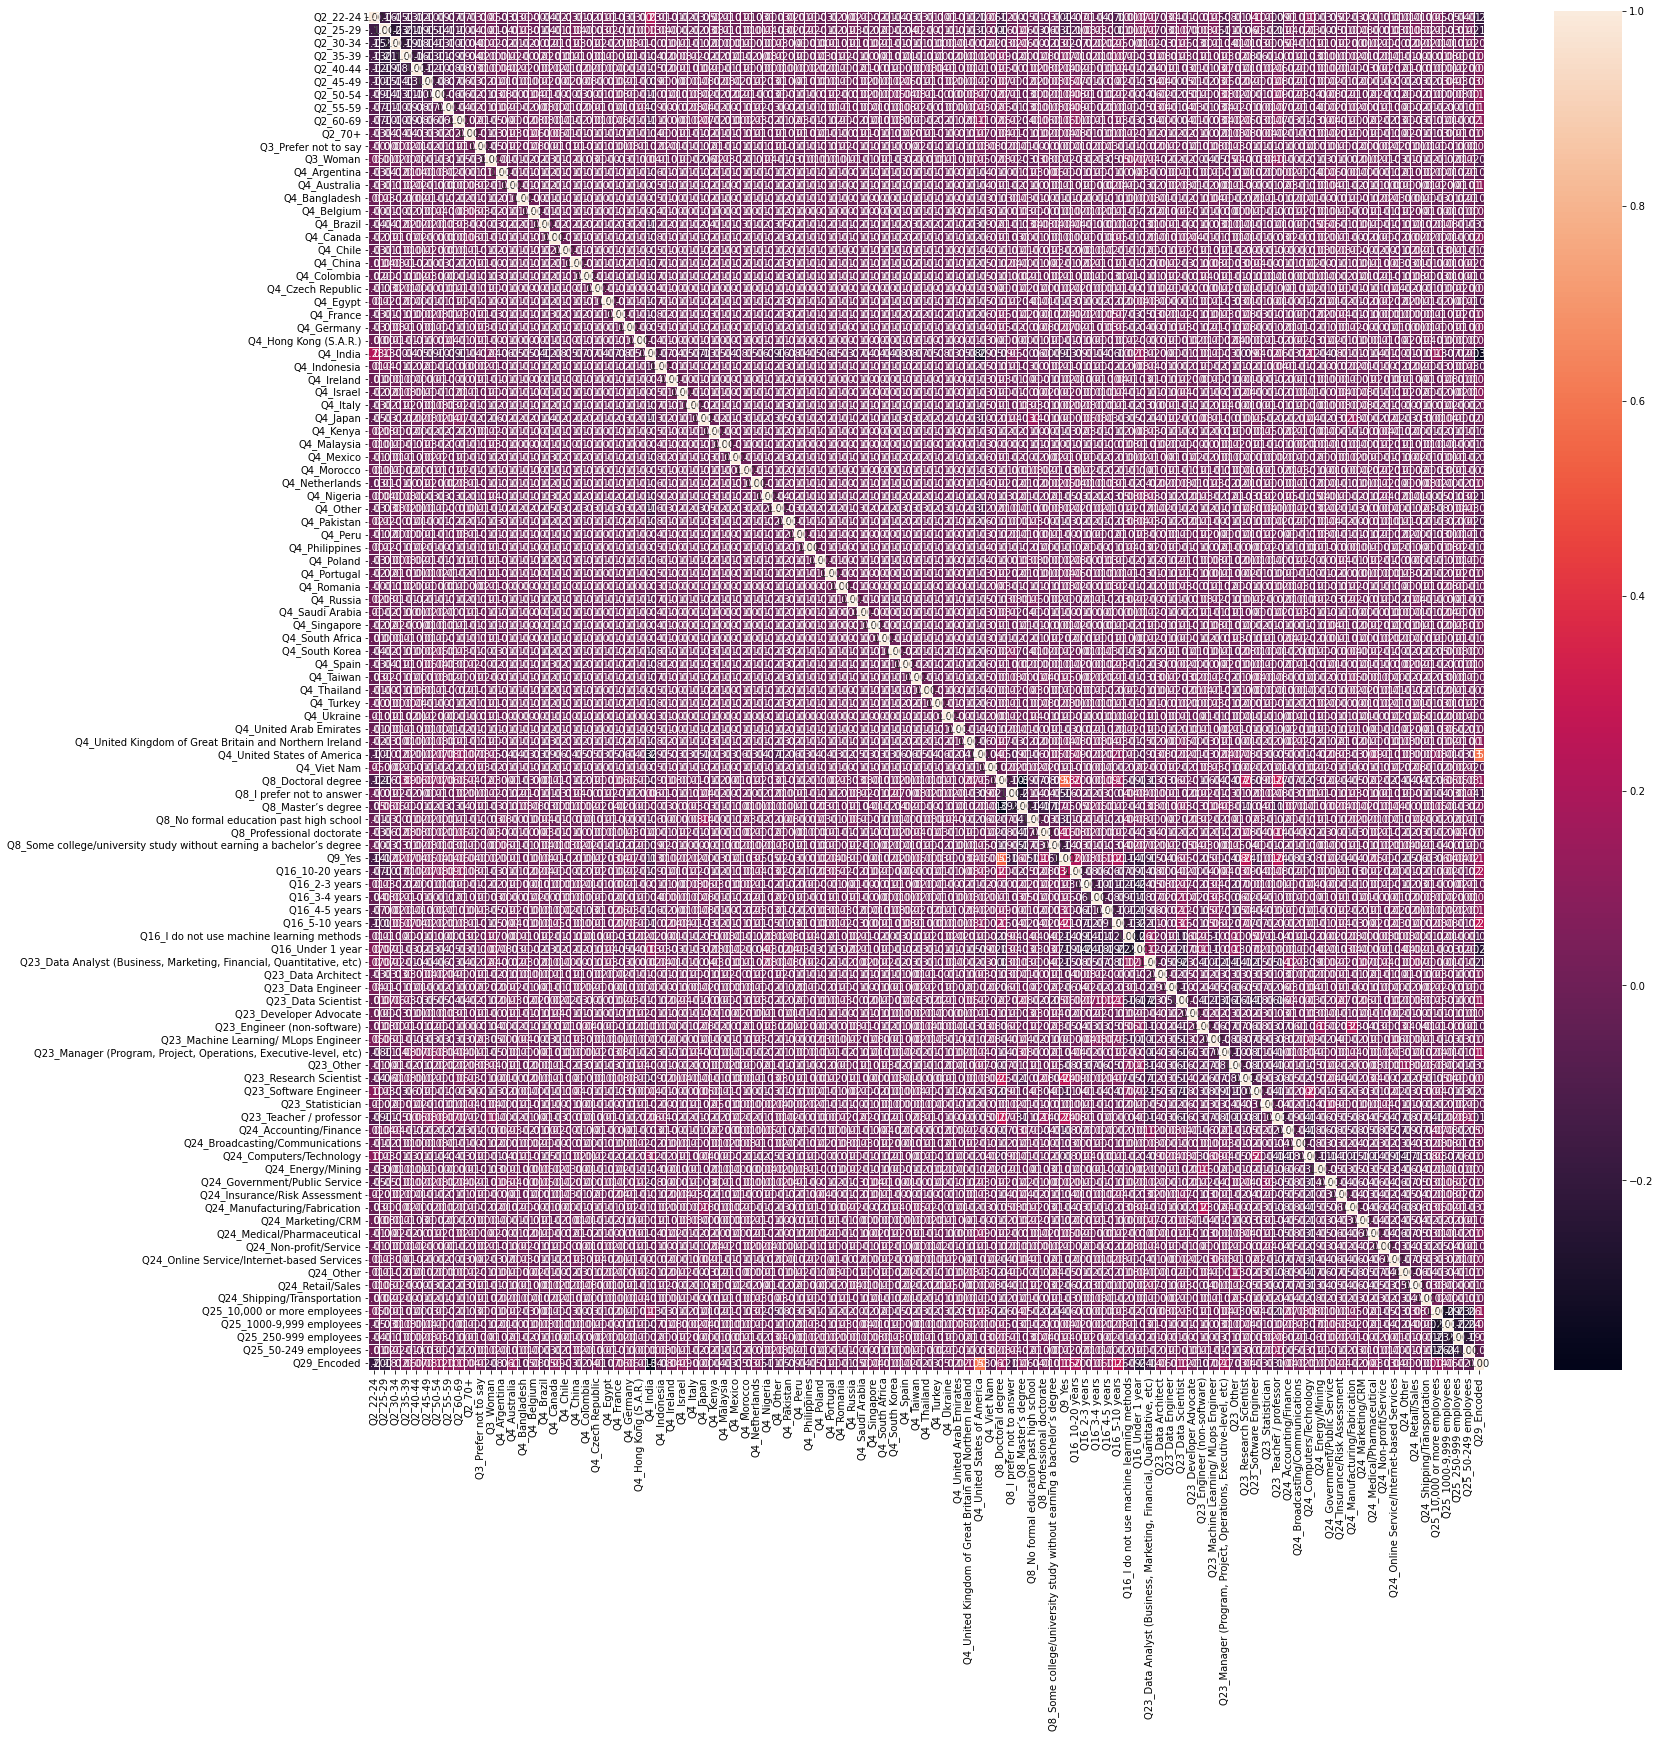

In [15]:
# Regularized regression --RandomForestClassifier
forest = RandomForestClassifier(random_state=0)
# Fit RandomForestClassifier with training set
forest.fit(X.values, y.values)
print('Estimated coefficient by forest: ', forest.feature_importances_)
# Find the unimportant features
zeros = np.where(forest.feature_importances_<=0.001)
# Drop the feature with low feature importance
X_chosen = X.drop(X.columns[zeros], axis=1)
# Correlation map
fig,axe = plt.subplots(figsize=(25,25))
X = pd.concat([X_chosen, y], axis=1)
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.2f', ax=axe);

In [16]:
# split the data into test train
X_train, X_test, y_train, y_test = train_test_split(X_chosen, y, test_size=0.3, random_state=0)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5695, 104)
(5695,)
(2441, 104)
(2441,)


# Model implementation

In [18]:
def Ordinal_Logistic_Regression(x_train, y_train, x_test, C=1.0, solver='lbfgs'):
    '''
    Given the numpy array input x_train, y_train, x_test with some C and solver method, 
    establish ordinal logistic regression on training set and return the prediction.
    '''
    # Define ordinal logistic regression model on training data
    model = LogisticRegression(C=C, solver=solver)
    
    for i in range(14):
        # Label the bucket with 0 and 1
        new_label = np.where(y_train <= i, 0, 1)
        # Fit model
        model.fit(x_train, new_label)
        # Compute the probability
        pred_prob = model.predict_proba(x_test)
        
        if i == 0:
            # In the first iteration, the probability is the first column of the matrix
            prob_matrix = pd.DataFrame(data={str(0):pred_prob[:,0]})
            # Record the probability matrix
            previous_prob = pred_prob
        else:
            # The probability of the bucket is the difference between new probability and the previous
            diff = pred_prob[:,0] - previous_prob[:,0]
            # Store the result
            prob_matrix[str(i)] = diff
            # Update the previous probability matrix
            previous_prob = pred_prob
    # The last probability is the second column of the matrix
    prob_matrix[str(14)] = pred_prob[:,1]
    # Find the maximum value and return its corresponding column name 
    prediction = prob_matrix.idxmax(axis=1)

    return prediction.values.astype(int)

Fold 1: Train Accuracy: 39.224%
Fold 1: Validation Accuracy: 32.554%
Fold 2: Train Accuracy: 38.798%
Fold 2: Validation Accuracy: 34.854%
Fold 3: Train Accuracy: 39.088%
Fold 3: Validation Accuracy: 32.61%
Fold 4: Train Accuracy: 39.809%
Fold 4: Validation Accuracy: 28.477%
Fold 5: Train Accuracy: 39.178%
Fold 5: Validation Accuracy: 36.455%
Fold 6: Train Accuracy: 39.344%
Fold 6: Validation Accuracy: 34.094%
Fold 7: Train Accuracy: 40.366%
Fold 7: Validation Accuracy: 32.126%
Fold 8: Train Accuracy: 38.747%
Fold 8: Validation Accuracy: 33.616%
Fold 9: Train Accuracy: 38.472%
Fold 9: Validation Accuracy: 39.593%
Fold 10: Train Accuracy: 39.006%
Fold 10: Validation Accuracy: 33.946%
Average Train Score: 39.203%( with variance 0.27%)
Average Validation Score: 33.833%( with variance 7.596%)


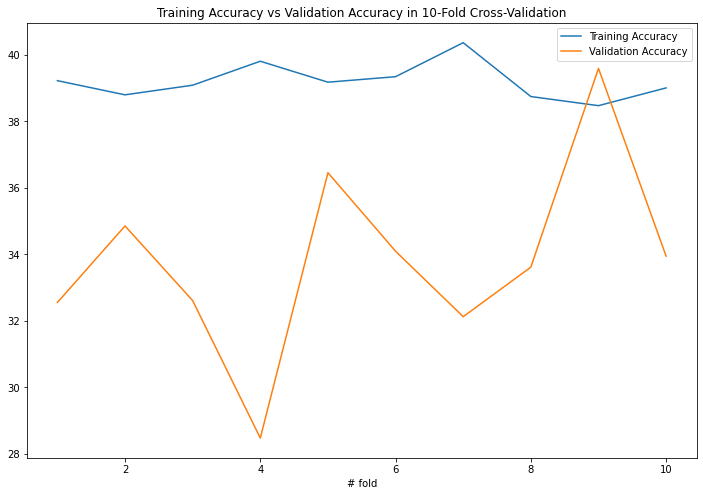

In [19]:
# Using 10-fold cross-validation
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)
# To store accuracy values
accuracy_train = np.zeros(10)
accuracy_val = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X_train):
    # Allocate the subset of training dataset as training set and validation set
    x_train, x_test = X_train.values[train_idx], X_train.values[test_idx]
    Y_train, Y_test = y_train.values[train_idx], y_train.values[test_idx]
    # Apply ordinal logistic regression
    result_train = Ordinal_Logistic_Regression(x_train, Y_train, x_train, C=10.0, solver='lbfgs')
    result_val = Ordinal_Logistic_Regression(x_train, Y_train, x_test, C=10.0, solver='lbfgs')
    # To compute accuracy
    acc_train = f1_score(Y_train, result_train, average='weighted')
    acc_val = f1_score(Y_test, result_val, average='weighted')

    accuracy_train[np_idx] = acc_train*100
    accuracy_val[np_idx] = acc_val*100
    np_idx += 1
    
    print ("Fold {}: Train Accuracy: {}%".format(np_idx, round(acc_train*100,3)))
    print ("Fold {}: Validation Accuracy: {}%".format(np_idx, round(acc_val*100,3)))  

print ("Average Train Score: {}%( with variance {}%)".format(round(np.mean(accuracy_train),3),
                                                             round(np.var(accuracy_train),3)))
print ("Average Validation Score: {}%( with variance {}%)".format(round(np.mean(accuracy_val),3),
                                                            round(np.var(accuracy_val),3)))

# Plot training accuracy vs validation accuracy
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,11), accuracy_train, label='Training Accuracy')
plt.plot(np.arange(1,11), accuracy_val, label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy in 10-Fold Cross-Validation')
plt.xlabel('# fold')
plt.legend()
plt.show()

# Model tuning

In [20]:
def Ordinal_Logistic_Regression_balanced(x_train, y_train, x_test, C=1.0, solver='lbfgs'):
    '''
    Given the numpy array input x_train, y_train, x_test with some C and solver method, 
    establish ordinal logistic regression on training set and return the prediction. Note that
    'class_weight' is set to 'balanced' to account for imbalanced data
    '''
    # Define ordinal logistic regression model on training data
    model = LogisticRegression(class_weight='balanced', C=C, solver=solver)
    
    for i in range(14):
        # Label the bucket with 0 and 1
        new_label = np.where(y_train <= i, 0, 1)
        # Fit model
        model.fit(x_train, new_label)
        # Compute the probability
        pred_prob = model.predict_proba(x_test)
        
        if i == 0:
            # In the first iteration, the probability is the first column of the matrix
            prob_matrix = pd.DataFrame(data={str(0):pred_prob[:,0]})
            # Record the probability matrix
            previous_prob = pred_prob
        else:
            # The probability of the bucket is the difference between new probability and the previous
            diff = pred_prob[:,0] - previous_prob[:,0]
            # Store the result
            prob_matrix[str(i)] = diff
            # Update the previous probability matrix
            previous_prob = pred_prob
    # The last probability is the second column of the matrix
    prob_matrix[str(14)] = pred_prob[:,1]
    # Find the maximum value and return its corresponding column name 
    prediction = prob_matrix.idxmax(axis=1)

    return prediction.values.astype(int)

Fold 1: Train Accuracy: 29.852%
Fold 1: Validation Accuracy: 27.031%
Fold 2: Train Accuracy: 30.107%
Fold 2: Validation Accuracy: 28.271%
Fold 3: Train Accuracy: 30.308%
Fold 3: Validation Accuracy: 27.019%
Fold 4: Train Accuracy: 31.371%
Fold 4: Validation Accuracy: 23.193%
Fold 5: Train Accuracy: 29.905%
Fold 5: Validation Accuracy: 32.24%
Fold 6: Train Accuracy: 30.524%
Fold 6: Validation Accuracy: 30.814%
Fold 7: Train Accuracy: 30.673%
Fold 7: Validation Accuracy: 27.958%
Fold 8: Train Accuracy: 29.945%
Fold 8: Validation Accuracy: 26.251%
Fold 9: Train Accuracy: 29.576%
Fold 9: Validation Accuracy: 32.381%
Fold 10: Train Accuracy: 30.113%
Fold 10: Validation Accuracy: 26.748%
Average Train Score: 30.238%( with variance 0.238%)
Average Validation Score: 28.19%( with variance 7.443%)


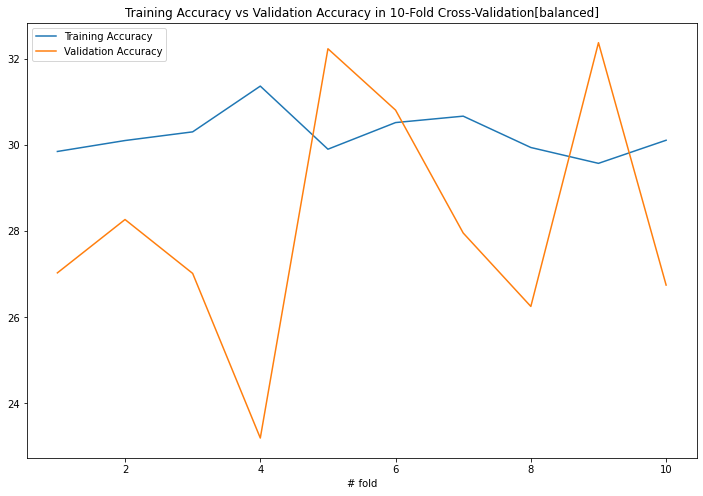

In [21]:
# Using 10-fold cross-validation
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)
# To store accuracy values
accuracy_train = np.zeros(10)
accuracy_val = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X_train):
    # Allocate the subset of training dataset as training set and validation set
    x_train, x_test = X_train.values[train_idx], X_train.values[test_idx]
    Y_train, Y_test = y_train.values[train_idx], y_train.values[test_idx]
    # Apply ordinal logistic regression
    result_train = Ordinal_Logistic_Regression_balanced(x_train, Y_train, x_train, C=1.0, solver='lbfgs')
    result_val = Ordinal_Logistic_Regression_balanced(x_train, Y_train, x_test, C=1.0, solver='lbfgs')
    # To compute accuracy
    acc_train = f1_score(Y_train, result_train, average='weighted')
    acc_val = f1_score(Y_test, result_val, average='weighted')

    accuracy_train[np_idx] = acc_train*100
    accuracy_val[np_idx] = acc_val*100
    np_idx += 1
    
    print ("Fold {}: Train Accuracy: {}%".format(np_idx, round(acc_train*100,3)))
    print ("Fold {}: Validation Accuracy: {}%".format(np_idx, round(acc_val*100,3)))  

print ("Average Train Score: {}%( with variance {}%)".format(round(np.mean(accuracy_train),3),
                                                             round(np.var(accuracy_train),3)))
print ("Average Validation Score: {}%( with variance {}%)".format(round(np.mean(accuracy_val),3),
                                                            round(np.var(accuracy_val),3)))

# Plot training accuracy vs validation accuracy
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,11), accuracy_train, label='Training Accuracy')
plt.plot(np.arange(1,11), accuracy_val, label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy in 10-Fold Cross-Validation[balanced]')
plt.xlabel('# fold')
plt.legend()
plt.show()

Best C is  10
Best accuracy: 33.833: with variance: 7.596% 


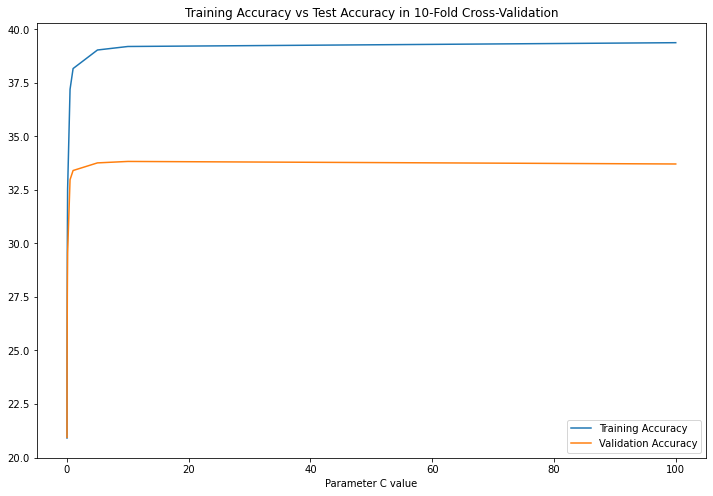

In [22]:
# Using 10-fold cross-validation
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)
# To store the optimal model information
best_params = {}
best_accuracy = 0
best_std = 0
# List of C values
l = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]
# To store the average accuracy values
avg_train = []
avg_val = []

# To select best C
for C in l:
    # To store the accuracy values for cross-validation
    accuracy_train = np.zeros(10)
    accuracy_val = np.zeros(10)
    np_idx = 0

    for train_idx, test_idx in kfold.split(X_train):
        # Allocate the subset of training dataset as training set and validation set
        x_train, x_test = X_train.values[train_idx], X_train.values[test_idx]
        Y_train, Y_test = y_train.values[train_idx], y_train.values[test_idx]
        # Fit model and predict
        result_train = Ordinal_Logistic_Regression(x_train, Y_train, x_train, C=C, solver='lbfgs')
        result_val = Ordinal_Logistic_Regression(x_train, Y_train, x_test, C=C, solver='lbfgs')

        # Calculate the accuracy
        acc_train = f1_score(Y_train, result_train, average='weighted')
        acc_val = f1_score(Y_test, result_val, average='weighted')
        # Store the value
        accuracy_train[np_idx] = acc_train*100
        accuracy_val[np_idx] = acc_val*100
        np_idx += 1
        
    # Store the value
    avg_train.append(np.mean(accuracy_train))
    avg_val.append(np.mean(accuracy_val))

    # Update the highest accuracy to find the best parameter and optimal model
    if np.mean(accuracy_val) > best_accuracy:
        best_params = {'C':C}
        best_accuracy = np.mean(accuracy_val)
        best_var = np.var(accuracy_val)

print('Best C is ', best_params['C'])
print ("Best accuracy: {}: with variance: {}% ".format(round(best_accuracy,3),round(best_var,3))) 
        
# Plot training accuracy vs validation accuracy
plt.figure(figsize=(12,8))
plt.plot(l, avg_train, label='Training Accuracy')
plt.plot(l, avg_val, label='Validation Accuracy')
plt.title('Training Accuracy vs Test Accuracy in 10-Fold Cross-Validation')
plt.xlabel('Parameter C value')
plt.legend()
plt.show()


The optimal log model uses C=10, and a sag solver, and has a cross validation score of 33.837% with a variance of 7.597%


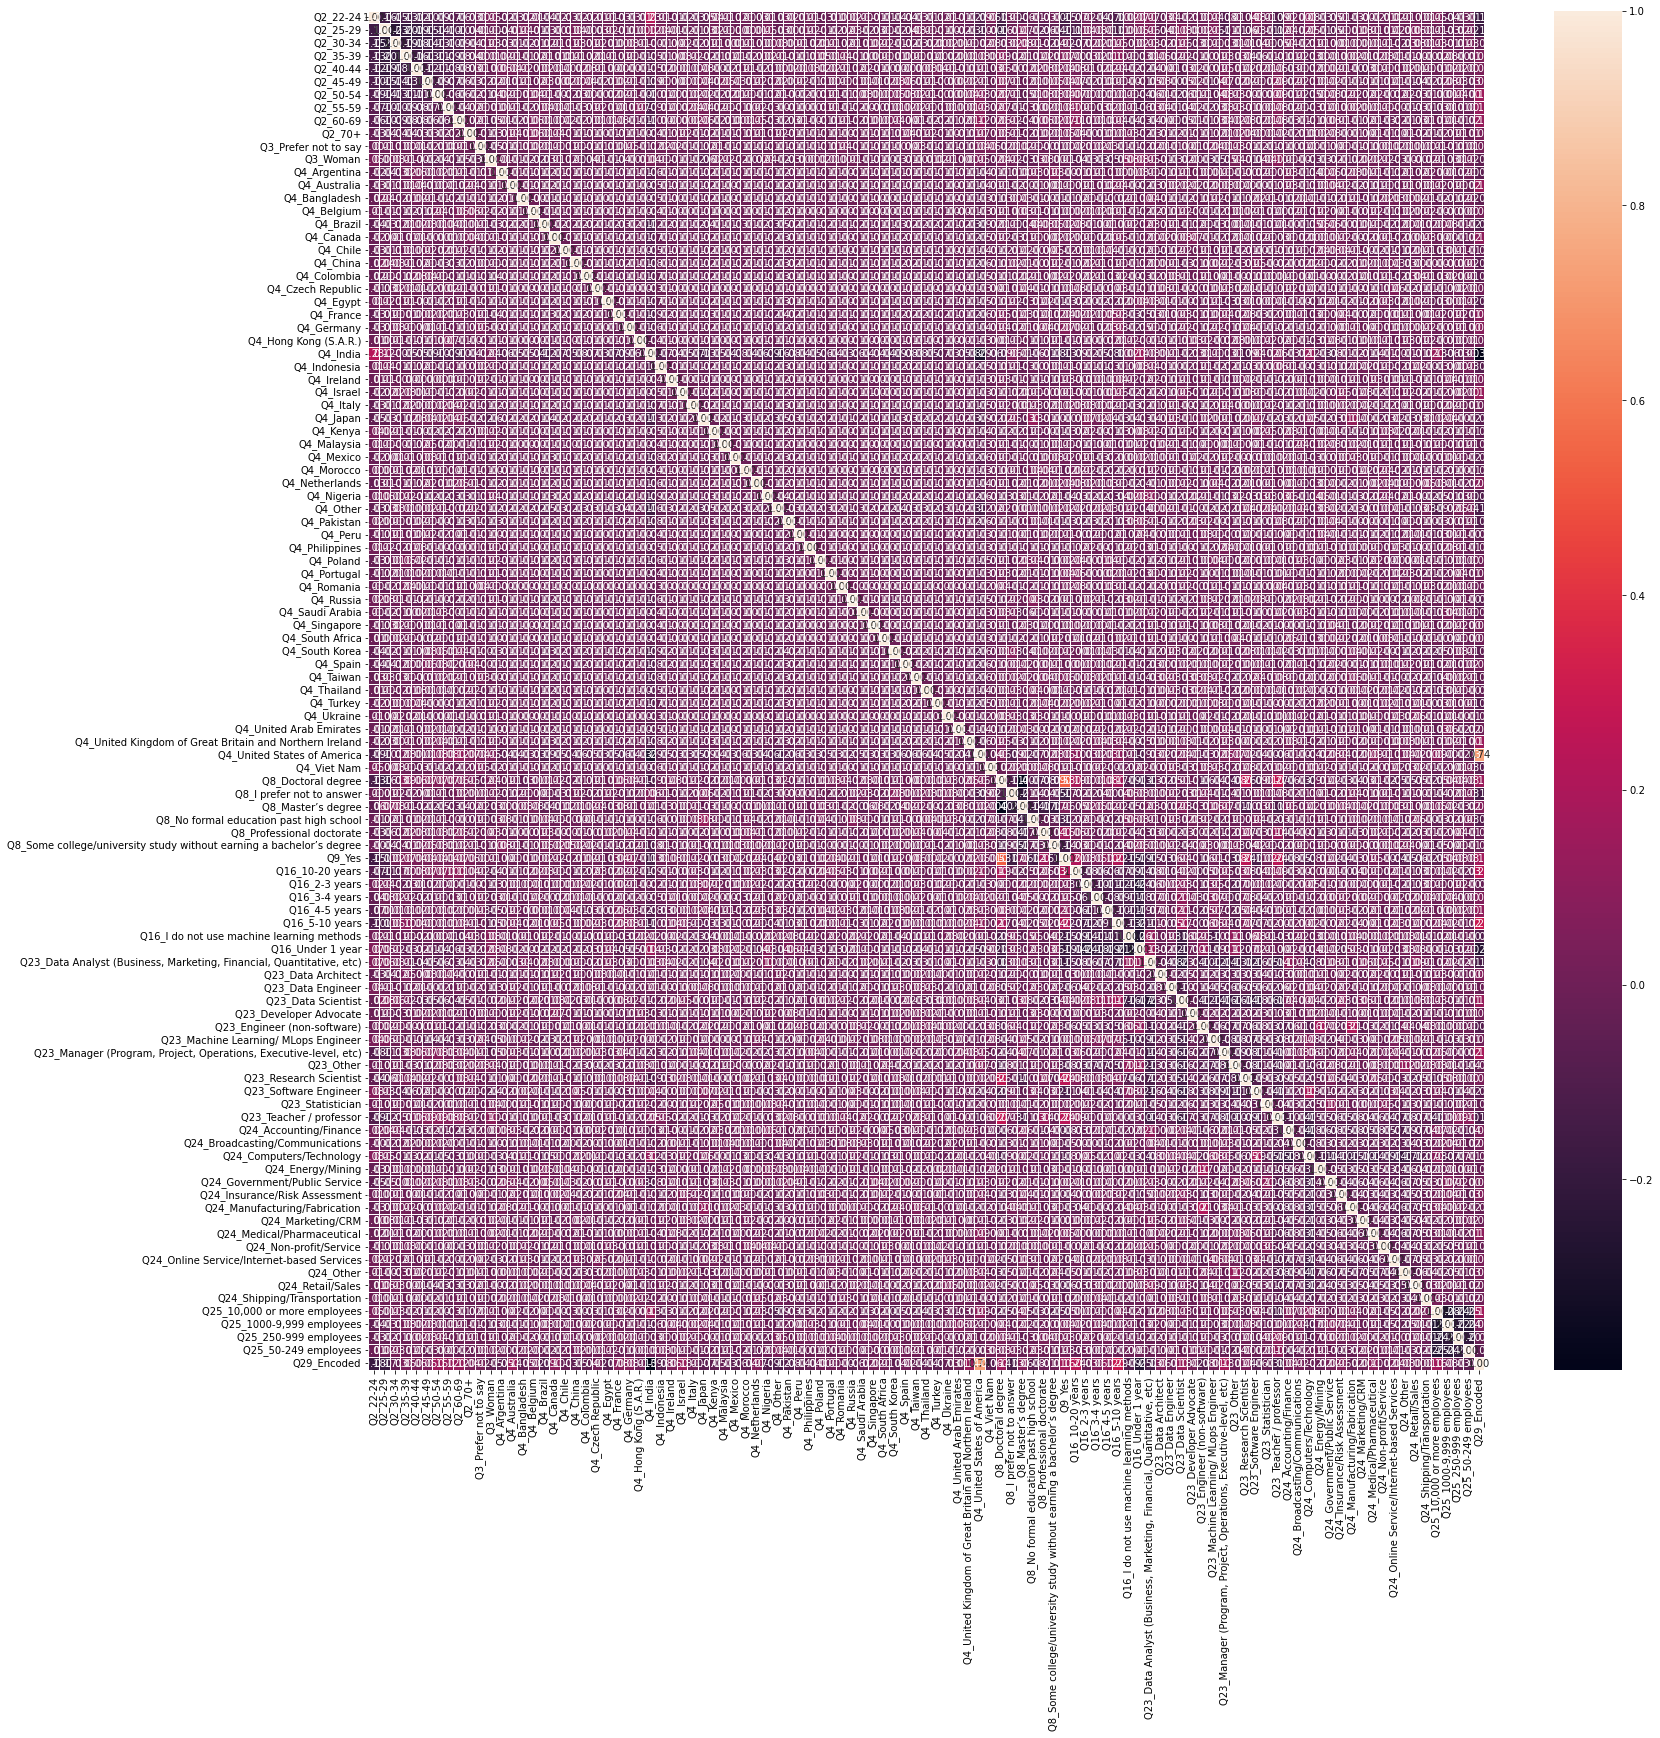

In [23]:
# Using 10-fold cross-validation
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)

# To store the optimal model information
best_params = {}
best_accuracy = 0
best_std = 0

# To select best C
for C in [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]:
    # To find the best solver method
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        # To store the accuracy values
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X_train):
            # Allocate the subset of training dataset as training set and validation set
            x_train, x_test = X_train.values[train_idx], X_train.values[test_idx]
            Y_train, Y_test = y_train.values[train_idx], y_train.values[test_idx]
            # Fit model and predict
            result = Ordinal_Logistic_Regression(x_train, Y_train, x_test, C=C, solver=solver)

            # Calculate the accuracy
            acc = f1_score(Y_test, result, average='weighted')

            accuracy[np_idx] = acc*100
            np_idx += 1
        # Update the highest accuracy to find the best parameter and optimal model
        if np.mean(accuracy) > best_accuracy:
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_var = np.var(accuracy)

# Make prediction
best_result = Ordinal_Logistic_Regression(X_train, y_train, X_train, C=best_params['C'], solver=best_params['solver'])
# Correlation map
fig,axe = plt.subplots(figsize=(25, 25))
dftrain_pred = X_train.copy()
dftrain_pred['Q29_Encoded'] = best_result
sns.heatmap(dftrain_pred.corr(), annot=True, linewidths=.5, fmt= '.2f', ax=axe);

print ("\nThe optimal log model uses C={}, and a {} solver, \
and has a cross validation score of {}% with a variance of {}%".format(
    best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_var,3)))

# Testing

Best model train score: 38.644%
Best model test score: 31.643%


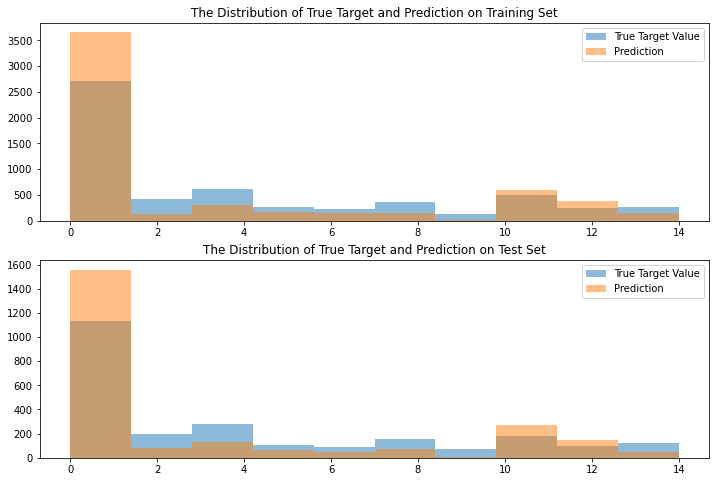

In [25]:
best_train = Ordinal_Logistic_Regression(X_train.values, y_train.values, X_train.values, 
                                        C=10, solver='lbfgs')
best_pred = Ordinal_Logistic_Regression(X_train.values, y_train.values, X_test.values, 
                                        C=10, solver='lbfgs')

# Calculate the accuracy
acc_train = f1_score(y_train.values, best_train, average='weighted')
acc_pred = f1_score(y_test.values, best_pred, average='weighted')
print ("Best model train score: {}%".format(round(acc_train*100,3)))
print ("Best model test score: {}%".format(round(acc_pred*100,3)))

# Plot the distribution of true target values and prediction on training and test set
fig, axs = plt.subplots(2, figsize=(12,8))
axs[0].hist(y_train.values, alpha=0.5, label='True Target Value')
axs[0].hist(best_train, alpha=0.5, label='Prediction')
axs[1].hist(y_test.values, alpha=0.5, label='True Target Value')
axs[1].hist(best_pred, alpha=0.5, label='Prediction')
# Add legend and title
axs[0].legend()
axs[1].legend()
axs[0].set_title('The Distribution of True Target and Prediction on Training Set')
axs[1].set_title('The Distribution of True Target and Prediction on Test Set')
plt.show();